In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [43]:
# Load the breast cancer data
file_path = 'breast_cancer_data.csv'
data = pd.read_csv(file_path)

In [45]:
# 1. Data Cleaning
# Remove the 'Unnamed: 32' column
data_cleaned = data.drop(columns=['Unnamed: 32'])

In [46]:
# Replace infinite values with NaNs and drop rows with NaNs
data_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
data_cleaned.dropna(inplace=True)

In [37]:
# Save the cleaned data for future use
data_cleaned.to_csv('breast_cancer_data_cleaned.csv', index=False)

In [47]:
# Scale the features to ensure proper handling of different ranges
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_cleaned.iloc[:, 2:])

In [48]:
# Create a new DataFrame with the scaled features
data_scaled = pd.DataFrame(scaled_features, columns=data_cleaned.columns[2:])
data_scaled['diagnosis'] = data_cleaned['diagnosis'].values

In [50]:
# Save the cleaned data for future use
data_cleaned.to_csv('breast_cancer_data_cleaned.csv', index=False)

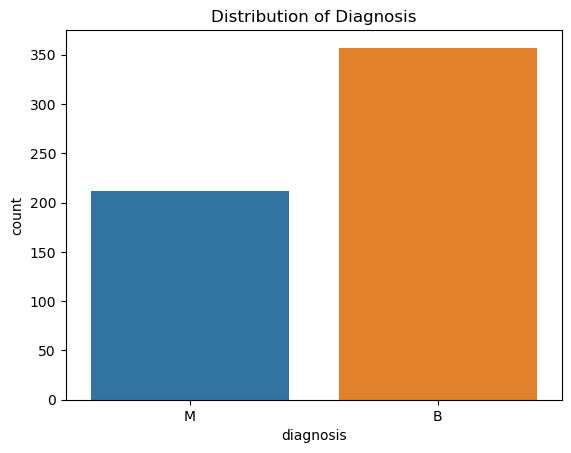

In [51]:
# 2. Exploratory Data Analysis (EDA)
# Distribution of diagnosis
sns.countplot(data=data_cleaned, x='diagnosis')
plt.title('Distribution of Diagnosis')
plt.show()

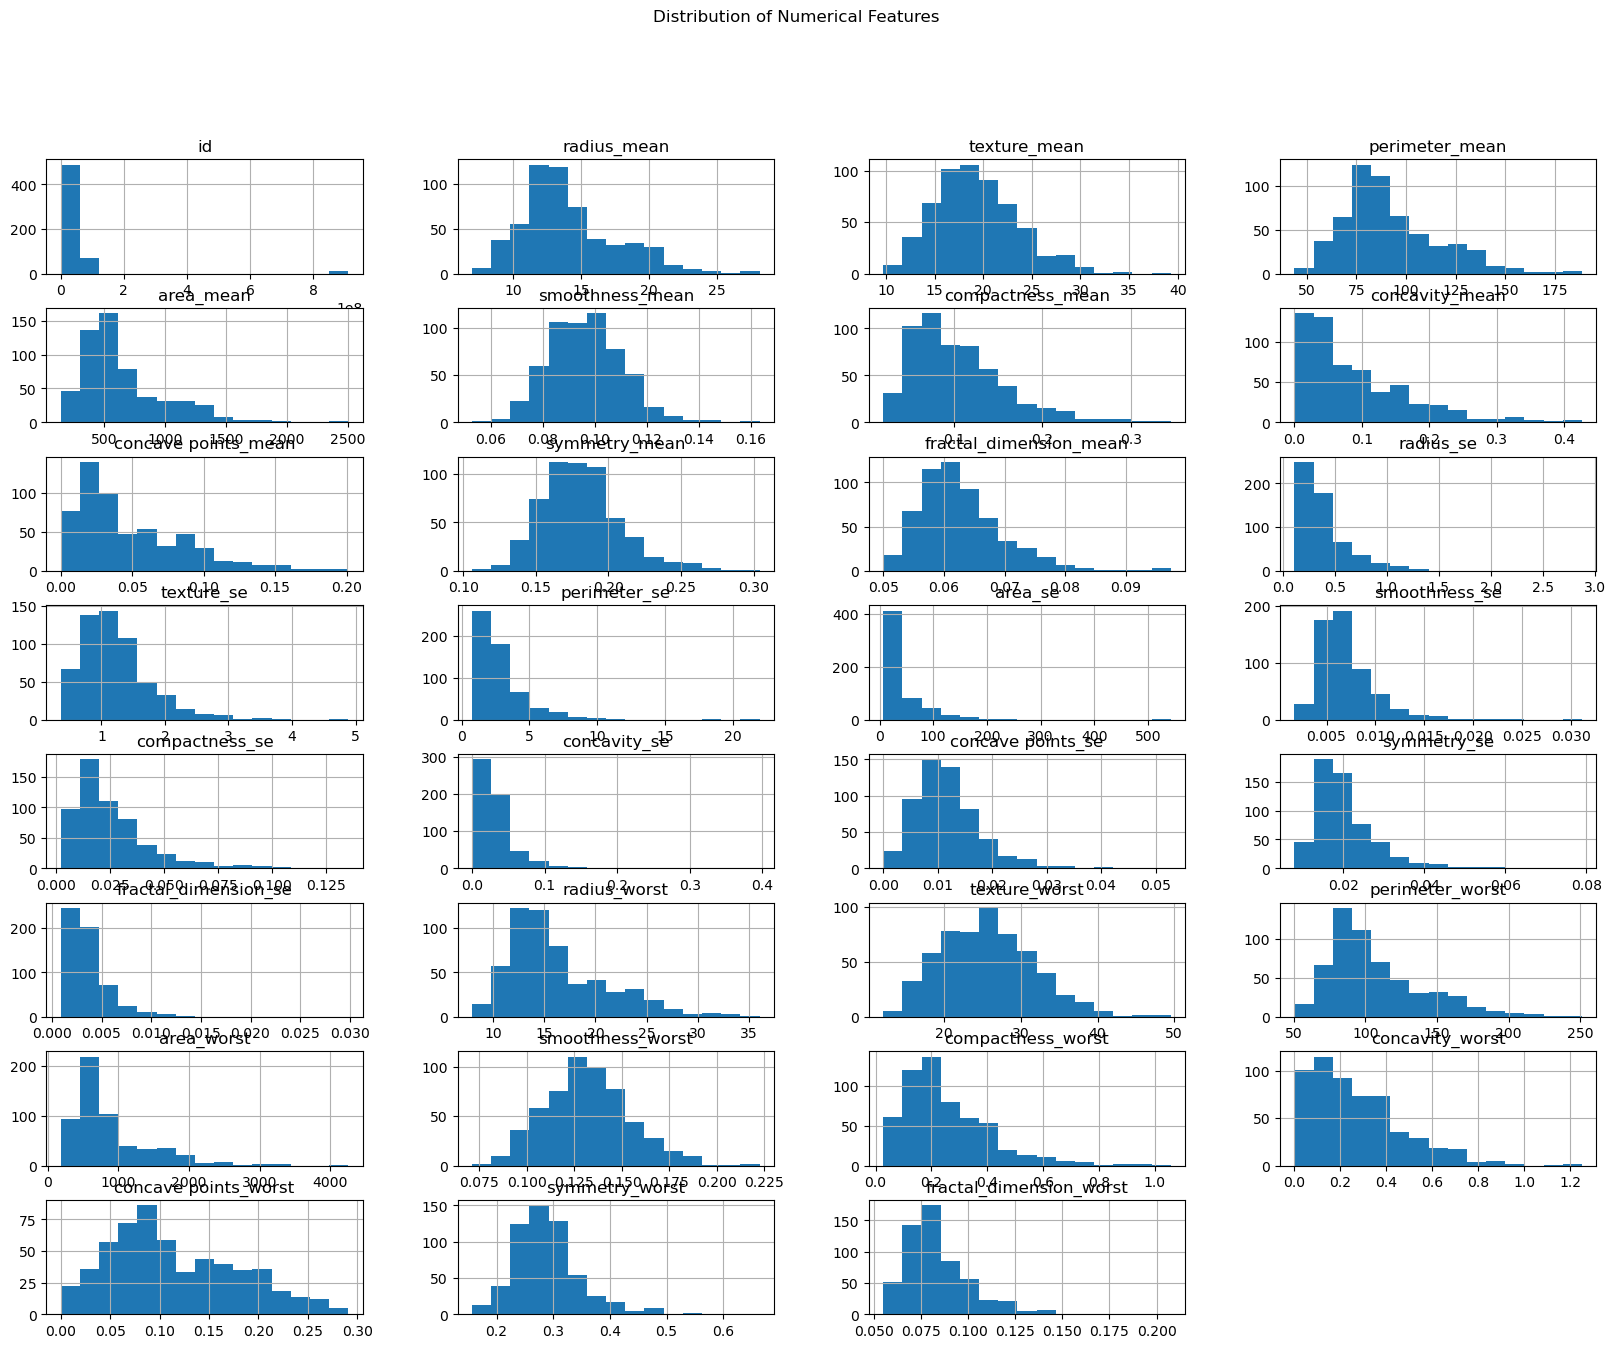

In [52]:
# Distribution of numerical features
data_cleaned.hist(bins=15, figsize=(20, 15), layout=(8, 4))
plt.suptitle('Distribution of Numerical Features')
plt.show()

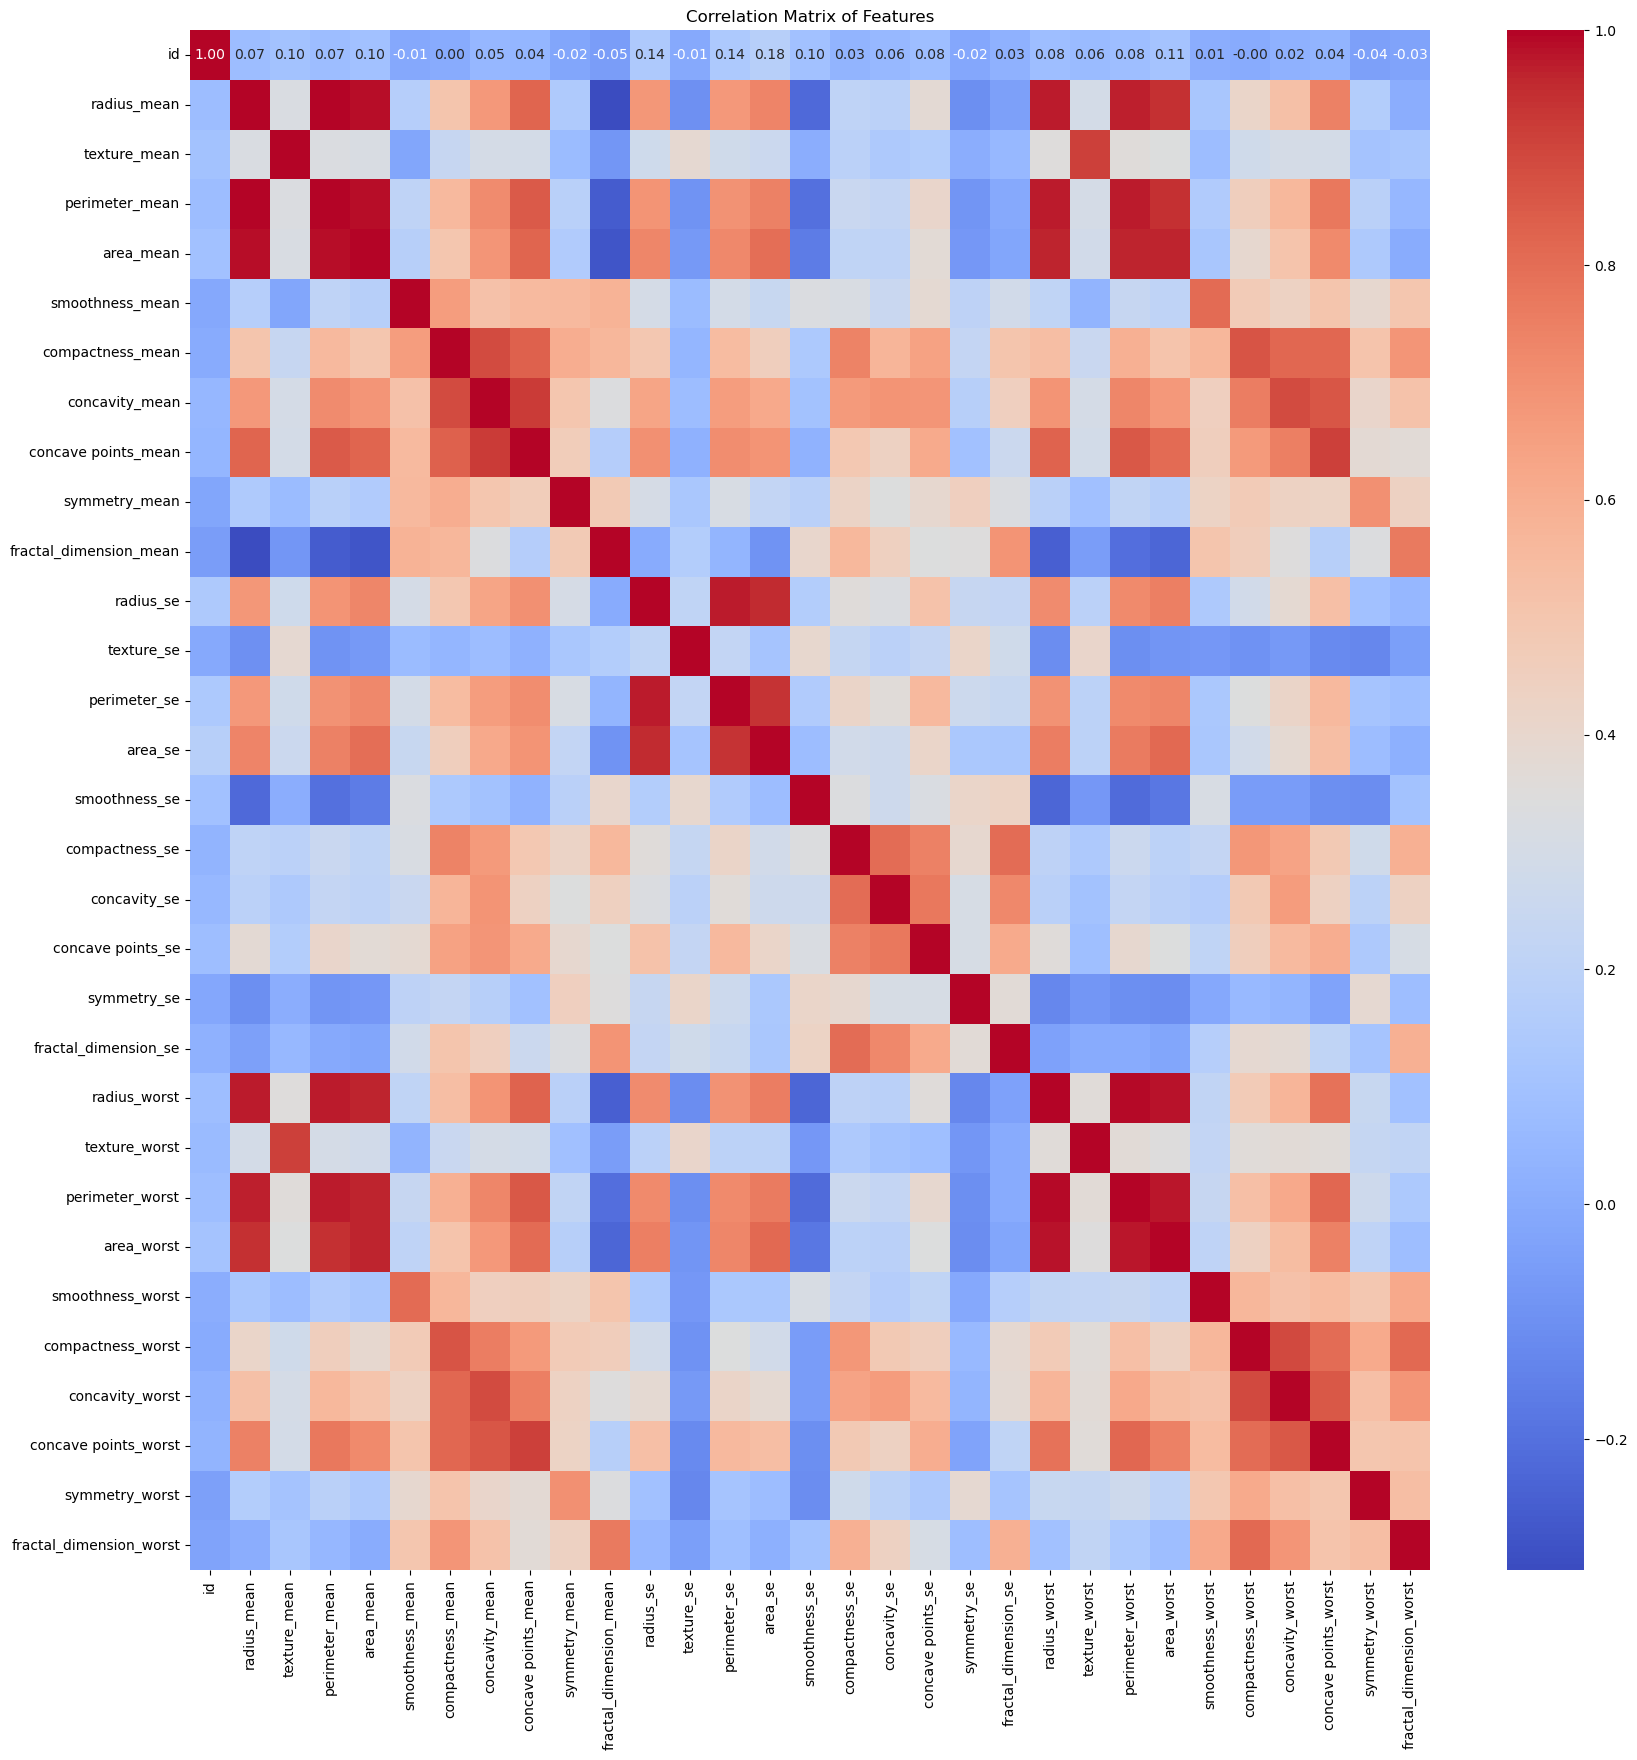

In [53]:
# Correlation heatmap
plt.figure(figsize=(20, 20))
# Exclude the 'diagnosis' column for correlation calculation
correlation_matrix = data_cleaned.drop(columns=['diagnosis']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [54]:
# Comparison of features between malignant and benign
malignant = data_scaled[data_scaled['diagnosis'] == 'M']
benign = data_scaled[data_scaled['diagnosis'] == 'B']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

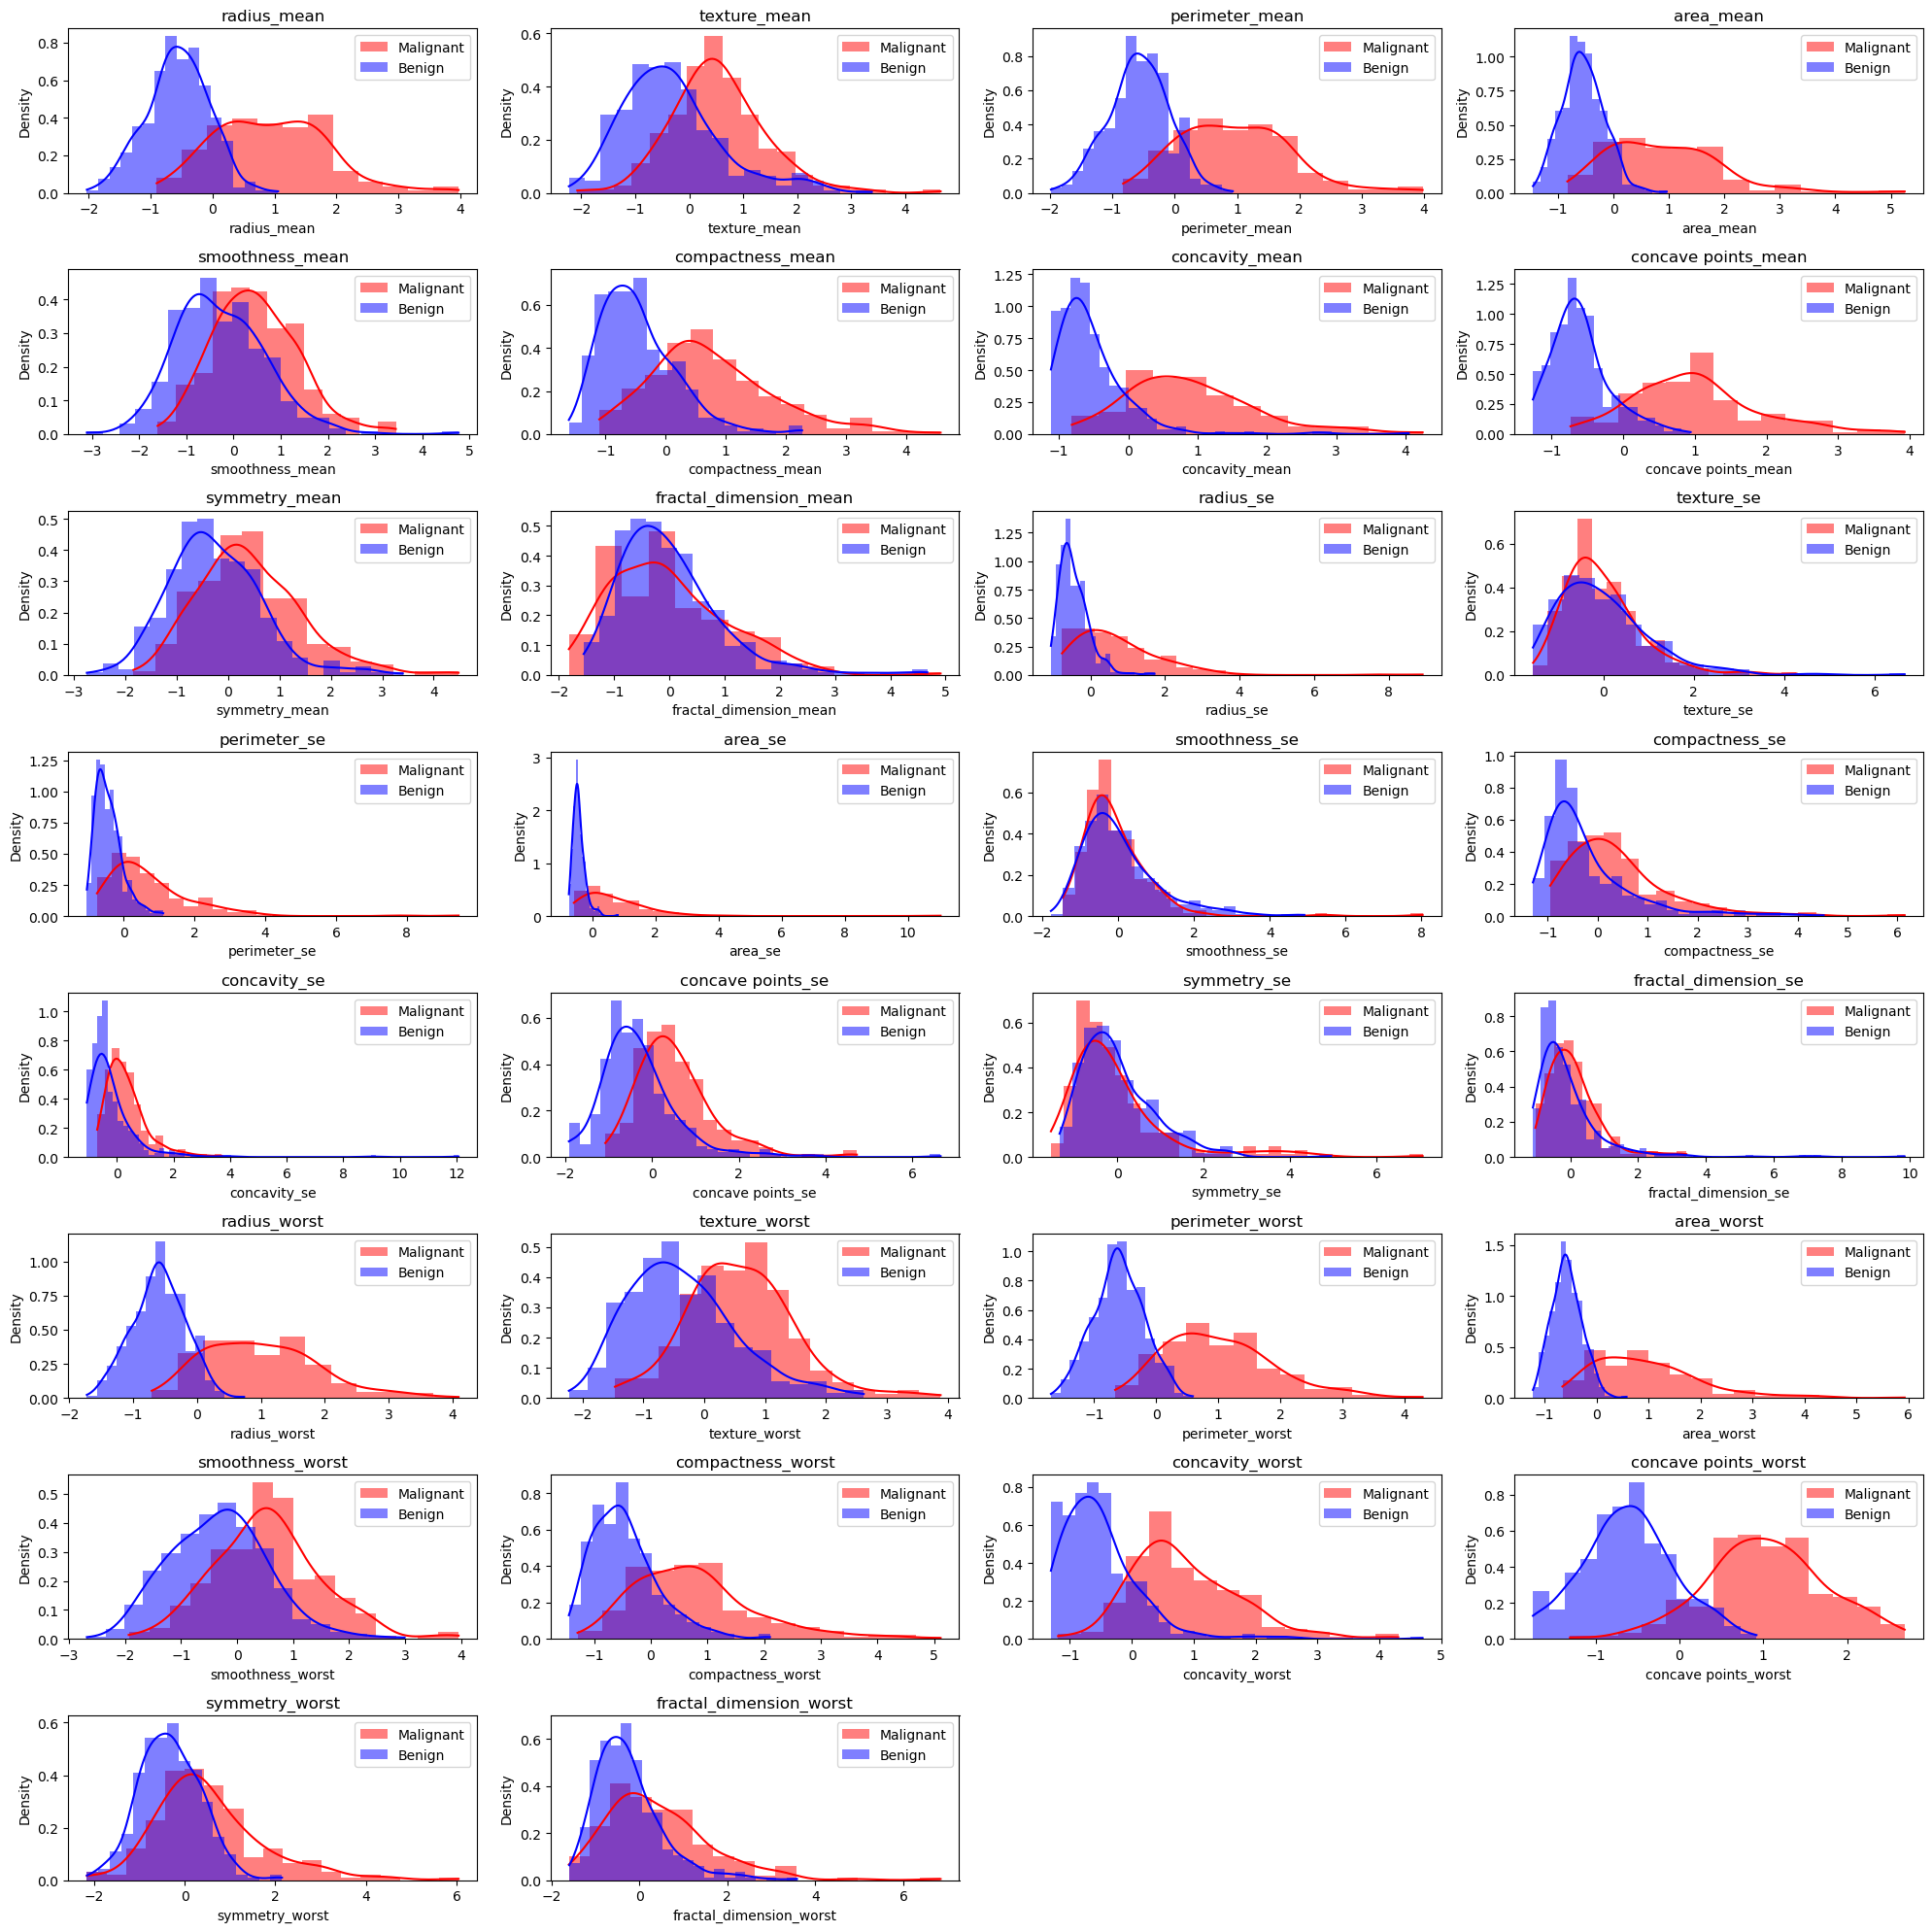

In [55]:
features = data_scaled.columns[:-1]

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(8, 4, i+1)
    sns.histplot(malignant[feature], color='red', label='Malignant', kde=True, stat="density", linewidth=0)
    sns.histplot(benign[feature], color='blue', label='Benign', kde=True, stat="density", linewidth=0)
    plt.legend()
    plt.title(feature)
plt.tight_layout()
plt.show()

In [56]:
# 3. Feature Selection
# Convert diagnosis to numerical
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

In [57]:
X = data_cleaned.drop(columns=['id', 'diagnosis'])
y = data_cleaned['diagnosis']

In [58]:
# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

In [59]:

selected_features = X.columns[selector.get_support()]

print('Top 10 features:', selected_features)

Top 10 features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [60]:
# 4. Model Building
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

In [61]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Predictions
y_pred = model.predict(X_test)

In [63]:
# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix:
 [[105   3]
 [  6  57]]
